In [ ]:
from pathlib import Path

from trackastra.model import Trackastra

c:\Users\Cyril\anaconda3\envs\tastra\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm




Welcome to CellposeSAM, cellpose v
cellpose version: 	4.0.3.dev23+gde041ff 
platform:       	win32 
python version: 	3.10.16 
torch version:  	2.6.0! The neural network component of
CPSAM is much larger than in previous versions and CPU excution is slow. 
We encourage users to use GPU/MPS if available. 




In [2]:
# model_path = Path(r"C:\Users\Cyril\Desktop\Code\thesis_misc\eval_scripts\BENCHMARK\general\RUNS\2025-07-22_12-00-55_zih_general_v4_sam21_aug")
model_path = Path(
    # r"C:\Users\Cyril\Desktop\Code\thesis_misc\eval_scripts\BENCHMARK\bacteria\RUNS\2025-06-24_20-10-57_vanvliet_sam21_aug_norm"
    r"C:\Users\Cyril\Desktop\Code\thesis_misc\eval_scripts\BENCHMARK\general/RUNS/2025-07-22_12-00-55_zih_general_v4_sam21_aug"
)

In [3]:
DATA_PATH = Path(
    # r"C:\Users\Cyril\Desktop\Code\thesis_misc\CTC_DATA\Fluo-N2DL-HeLa"
    # r"C:\Users\Cyril\Desktop\Code\thesis_misc\CTC_DATA\BF-C2DL-MuSC"
    # r"C:\Users\Cyril\Desktop\Code\thesis_misc\CTC_DATA\Fluo-C2DL-Huh7"
    r"C:\Users\Cyril\Desktop\Code\thesis_misc\CTC_DATA\vanvliet/recA/151031-03"
)

In [4]:
VIDEO = "img"
USE_ERR_SEG = False

In [5]:
model = Trackastra.from_folder(model_path)

INFO:trackastra.model.model:Loading model state from C:\Users\Cyril\Desktop\Code\thesis_misc\eval_scripts\BENCHMARK\general\RUNS\2025-07-22_12-00-55_zih_general_v4_sam21_aug\model.pt
INFO:trackastra.model.model_api:Using device cuda
INFO:trackastra.model.model_api:Default batch size = 4 for model on cuda.


In [6]:
model_general = Trackastra.from_pretrained("general_2d")

INFO:trackastra.model.model:Loading model state from C:\Users\Cyril\Desktop\Code\trackastra-fork\trackastra\.models\general_2d\model.pt


C:\Users\Cyril\Desktop\Code\trackastra-fork\trackastra\.models\general_2d already downloaded, skipping.


INFO:trackastra.model.model_api:Using device cuda
INFO:trackastra.model.model_api:Default batch size = 4 for model on cuda.


In [7]:
graph_general_2d, masks_tra_general_2d = model_general.track_from_disk(
    DATA_PATH / VIDEO,
    # DATA_PATH / f"{VIDEO}_ST/SEG" if not USE_ERR_SEG else
    # DATA_PATH / f"{VIDEO}_ERR_SEG"
    # DATA_PATH / f"{VIDEO}_GT/TRA"
    DATA_PATH / "TRA",
)

INFO:trackastra.model.model_api:Predicting weights for candidate graph
INFO:trackastra.data.wrfeat:Extracting features from 23 frames.
INFO:trackastra.data.wrfeat:Using single process for feature extraction
Extracting features: 100%|██████████| 23/23 [00:00<00:00, 70.18it/s] 
INFO:trackastra.model.model_api:Building windows
Building windows: 100%|██████████| 20/20 [00:00<00:00, 4142.11it/s]
INFO:trackastra.model.model_api:Predicting windows
Computing associations: 100%|██████████| 5/5 [00:01<00:00,  4.86it/s]
INFO:trackastra.model.model_api:Running greedy tracker
INFO:trackastra.tracking.tracking:Build candidate graph with delta_t=1
INFO:trackastra.tracking.tracking:Added 417 vertices, 434 edges               
INFO:trackastra.tracking.tracking:Running greedy tracker
Greedily matched edges:  95%|█████████▌| 414/434 [00:00<00:00, 90633.22it/s]


In [8]:
graph, masks_tra = model.track_from_disk(
    DATA_PATH / VIDEO,
    # DATA_PATH / f"{VIDEO}_ST/SEG" if not USE_ERR_SEG else
    # DATA_PATH / f"{VIDEO}_ERR_SEG"
    # DATA_PATH / f"{VIDEO}_GT/TRA"
    DATA_PATH / "TRA",
)

INFO:trackastra_pretrained_feats.pretrained_features:Using model facebook/sam2.1-hiera-base-plus with mode mean_patches_exact for pretrained feature extraction.
INFO:root:Loaded checkpoint sucessfully
INFO:trackastra.model.model_api:Predicting weights for candidate graph
INFO:trackastra.data.wrfeat:Extracting features from 23 frames.
INFO:trackastra.model.model_api:Building windows                   
Building windows: 100%|██████████| 20/20 [00:00<00:00, 3648.65it/s]
INFO:trackastra.model.model_api:Predicting windows
Computing associations: 100%|██████████| 5/5 [00:00<00:00, 23.63it/s]
INFO:trackastra.model.model_api:Running greedy tracker
INFO:trackastra.tracking.tracking:Build candidate graph with delta_t=1
INFO:trackastra.tracking.tracking:Added 417 vertices, 438 edges               
INFO:trackastra.tracking.tracking:Running greedy tracker
Greedily matched edges:  95%|█████████▌| 418/438 [00:00<00:00, 66626.86it/s]


In [9]:
from trackastra.tracking import graph_to_ctc, graph_to_napari_tracks

In [10]:
ctc_tracks, ctc_masks = graph_to_ctc(
    graph,
    masks_tra,
    outdir="tracked_ctc",
)
ctc_tracks_general_2d, ctc_masks_general_2d = graph_to_ctc(
    graph_general_2d,
    masks_tra_general_2d,
    outdir="tracked_ctc_general_2d",
)

Saving masks: 100%|██████████| 23/23 [00:00<00:00, 210.68it/s]


In [11]:
napari_tracks, napari_tracks_graph, _ = graph_to_napari_tracks(graph)
napari_tracks_general_2d, napari_tracks_graph_general_2d, _ = graph_to_napari_tracks(
    graph_general_2d
)

100%|██████████| 182/182 [00:00<00:00, 135805.61it/s]


In [12]:
import napari

v = napari.Viewer()
# v.add_image(imgs)
v.add_labels(masks_tra)
v.add_tracks(data=napari_tracks, graph=napari_tracks_graph)

v.add_labels(masks_tra_general_2d, name="masks_general_2d")
v.add_tracks(
    data=napari_tracks_general_2d,
    graph=napari_tracks_graph_general_2d,
    name="tracks_general_2d",
)

<Tracks layer 'tracks_general_2d' at 0x2041e0e1270>

In [13]:
import pprint as pp
import napari
import numpy as np
from tqdm import tqdm
from traccuracy import run_metrics
from traccuracy.loaders import load_ctc_data
from traccuracy.matchers import CTCMatcher
from traccuracy.metrics import CTCMetrics

from divisualisation import Divisualisation
from divisualisation.utils import load_tiff_timeseries, rescale_intensity

In [14]:
gt = load_ctc_data(
    # DATA_PATH / f"{VIDEO}_GT/TRA",
    DATA_PATH / "TRA",
    # DATA_PATH / f"{VIDEO}_GT/TRA/man_track.txt",
    DATA_PATH / "TRA/man_track.txt",
    name="GT",
)
pred_sam21 = load_ctc_data(
    "./tracked_ctc",
    "./tracked_ctc/man_track.txt",
    name="res",
)
pred_general_2d = load_ctc_data(
    "./tracked_ctc_general_2d",
    "./tracked_ctc_general_2d/man_track.txt",
    name="res_general_2d",
)

img = load_tiff_timeseries(DATA_PATH / VIDEO)

Computing node attributes: 100%|██████████| 23/23 [00:00<00:00, 256.80it/s]
INFO:traccuracy.loaders._ctc:Running CTC format checks
Computing node attributes: 100%|██████████| 23/23 [00:00<00:00, 265.37it/s]
INFO:traccuracy.loaders._ctc:Running CTC format checks
Computing node attributes: 100%|██████████| 23/23 [00:00<00:00, 248.72it/s]
INFO:traccuracy.loaders._ctc:Running CTC format checks


In [15]:
img = np.stack([
    rescale_intensity(_x, pmin=5, pmax=99.9, clip=False, subsample=1)
    for _x in tqdm(img, desc="Rescale intensity")
])

Rescale intensity: 100%|██████████| 23/23 [00:00<00:00, 96.11it/s]


In [16]:
ctc_results, ctc_matched = run_metrics(
    gt_data=gt,
    # pred_data=pred,
    # gt_data=pred_sam21,
    # pred_data=pred_sam21,
    pred_data=pred_general_2d,
    matcher=CTCMatcher(),
    metrics=[CTCMetrics()],
)
pp.pprint(ctc_results)

Matching frames: 100%|██████████| 23/23 [00:00<00:00, 149.24it/s]
INFO:traccuracy.matchers._base:Matched 414 out of 417 ground truth nodes.
INFO:traccuracy.matchers._base:Matched 414 out of 414 predicted nodes.
Evaluating FN edges: 100%|██████████| 416/416 [00:00<00:00, 267899.66it/s]

[{'gt': 'GT',
  'matcher': {'matching type': 'one-to-one', 'name': 'CTCMatcher'},
  'metric': {'e_weights': {'fn': 1.5, 'fp': 1, 'ws': 1},
             'name': 'CTCMetrics',
             'v_weights': {'fn': 10, 'fp': 1, 'ns': 5},
             'valid_match_types': ['one-to-one', 'many-to-one']},
  'pred': 'res_general_2d',
  'results': {'AOGM': 67.5,
              'DET': 0.9928057553956835,
              'TRA': 0.9859198998748435,
              'fn_edges': 13,
              'fn_nodes': 3,
              'fp_edges': 5,
              'fp_nodes': 0,
              'ns_nodes': 0,
              'ws_edges': 13},
  'version': '0.2.0'}]


# vanvliet/recA/151031-03

## img

- SAM21 vs GT, img TRA : 15 AOGM
- general_2D vs GT, img TRA : 30 AOGM

# Fluo-C2DL-Huh7

## 01

- SAM21 vs GT, 01 TRA : 4 AOGM
- general_2D vs GT, 01 TRA : 4 AOGM

## 02

- SAM21 vs GT, 02 TRA : 20.5 AOGM
- general_2D vs GT, 02 TRA : 24 AOGM

# BF-C2DL-MuSC

## 01

- SAM21 vs GT, 01 ST SEG : 764 AOGM
- general_2D vs GT, 01 ST SEG : 726 AOGM

- SAM21 vs GT, 01 ERR SEG : 662 AOGM
- general_2D vs GT, 01 ERR SEG : 776 AOGM

# Fluo-N2DL-HeLa

## 01

- SAM21 vs GT, 01 ST SEG : 542 AOGM
- general_2D vs GT, 01 ST SEG : 550.5 AOGM

- SAM21 vs GT, 01 ERR SEG : 549.5 AOGM
- general_2D vs GT, 01 ERR SEG : 535.5 AOGM


## 02

- SAM21 vs GT, 02 ST SEG : 805.5 AOGM
- general_2D vs GT, 02 ST SEG : 842 AOGM

- SAM21 vs GT, 02 ERR SEG : 765 AOGM
- general_2D vs GT, 02 ERR SEG : 723 AOGM

In [17]:
import pandas as pd

data = {
    "vanvliet_recA_151031-03": {
        "img": [
            {"model": "SAM21", "masks": "TRA", "AOGM": 15.0},
            {"model": "general_2D", "masks": "TRA", "AOGM": 30.0},
        ],
    },
    "Fluo-C2DL-Huh7": {
        "01": [
            {"model": "SAM21", "masks": "TRA", "AOGM": 4},
            {"model": "general_2D", "masks": "TRA", "AOGM": 4},
        ],
        "02": [
            {"model": "SAM21", "masks": "TRA", "AOGM": 20.5},
            {"model": "general_2D", "masks": "TRA", "AOGM": 24},
        ],
    },
    "BF-C2DL-MuSC": {
        "01": [
            {"model": "SAM21", "masks": "ST SEG", "AOGM": 764},
            {"model": "general_2D", "masks": "ST SEG", "AOGM": 726},
            {"model": "SAM21", "masks": "ERR SEG", "AOGM": 662},
            {"model": "general_2D", "masks": "ERR SEG", "AOGM": 776},
        ],
    },
    "Fluo-N2DL-HeLa": {
        "01": [
            {"model": "SAM21", "masks": "ST SEG", "AOGM": 542},
            {"model": "general_2D", "masks": "ST SEG", "AOGM": 550.5},
            {"model": "SAM21", "masks": "ERR SEG", "AOGM": 549.5},
            {"model": "general_2D", "masks": "ERR SEG", "AOGM": 535.5},
        ],
        "02": [
            {"model": "SAM21", "masks": "ST SEG", "AOGM": 805.5},
            {"model": "general_2D", "masks": "ST SEG", "AOGM": 842},
            {"model": "SAM21", "masks": "ERR SEG", "AOGM": 765},
            {"model": "general_2D", "masks": "ERR SEG", "AOGM": 723},
        ],
    },
}

rows = []
for video_name, videos in data.items():
    for video_number, entries in videos.items():
        for entry in entries:
            rows.append({
                "video_name": video_name,
                "video_number": video_number,
                "model": entry.get("model"),
                "masks": entry.get("masks"),
                "AOGM": entry.get("AOGM"),
            })

df = pd.DataFrame(rows)
df["AOGM"] = pd.to_numeric(df["AOGM"])
df["video_id"] = df["video_name"] + "_" + df["video_number"]
df["model_condition"] = df["model"] + "_" + df["masks"]
df

,video_name,video_number,model,masks,AOGM,video_id,model_condition
0,vanvliet_recA_151031-03,img,SAM21,TRA,15.0,vanvliet_recA_151031-03_img,SAM21_TRA
1,vanvliet_recA_151031-03,img,general_2D,TRA,30.0,vanvliet_recA_151031-03_img,general_2D_TRA
2,Fluo-C2DL-Huh7,01,SAM21,TRA,4.0,Fluo-C2DL-Huh7_01,SAM21_TRA
3,Fluo-C2DL-Huh7,01,general_2D,TRA,4.0,Fluo-C2DL-Huh7_01,general_2D_TRA
4,Fluo-C2DL-Huh7,02,SAM21,TRA,20.5,Fluo-C2DL-Huh7_02,SAM21_TRA
5,Fluo-C2DL-Huh7,02,general_2D,TRA,24.0,Fluo-C2DL-Huh7_02,general_2D_TRA
6,BF-C2DL-MuSC,01,SAM21,ST SEG,764.0,BF-C2DL-MuSC_01,SAM21_ST SEG
7,BF-C2DL-MuSC,01,general_2D,ST SEG,726.0,BF-C2DL-MuSC_01,general_2D_ST SEG
8,BF-C2DL-MuSC,01,SAM21,ERR SEG,662.0,BF-C2DL-MuSC_01,SAM21_ERR SEG
9,BF-C2DL-MuSC,01,general_2D,ERR SEG,776.0,BF-C2DL-MuSC_01,general_2D_ERR SEG


In [18]:
df[(df["masks"] == "ST SEG") | (df["masks"] == "TRA")]

,video_name,video_number,model,masks,AOGM,video_id,model_condition
0,vanvliet_recA_151031-03,img,SAM21,TRA,15.0,vanvliet_recA_151031-03_img,SAM21_TRA
1,vanvliet_recA_151031-03,img,general_2D,TRA,30.0,vanvliet_recA_151031-03_img,general_2D_TRA
2,Fluo-C2DL-Huh7,01,SAM21,TRA,4.0,Fluo-C2DL-Huh7_01,SAM21_TRA
3,Fluo-C2DL-Huh7,01,general_2D,TRA,4.0,Fluo-C2DL-Huh7_01,general_2D_TRA
4,Fluo-C2DL-Huh7,02,SAM21,TRA,20.5,Fluo-C2DL-Huh7_02,SAM21_TRA
5,Fluo-C2DL-Huh7,02,general_2D,TRA,24.0,Fluo-C2DL-Huh7_02,general_2D_TRA
6,BF-C2DL-MuSC,01,SAM21,ST SEG,764.0,BF-C2DL-MuSC_01,SAM21_ST SEG
7,BF-C2DL-MuSC,01,general_2D,ST SEG,726.0,BF-C2DL-MuSC_01,general_2D_ST SEG
10,Fluo-N2DL-HeLa,01,SAM21,ST SEG,542.0,Fluo-N2DL-HeLa_01,SAM21_ST SEG
11,Fluo-N2DL-HeLa,01,general_2D,ST SEG,550.5,Fluo-N2DL-HeLa_01,general_2D_ST SEG


In [19]:
df.to_csv("model_comparison_results.csv", index=False)

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

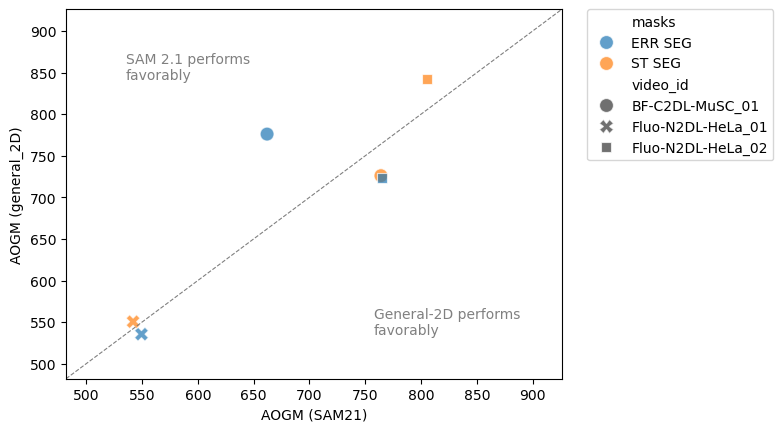

In [21]:
df_pivot = df.pivot_table(
    index=["video_id", "masks"], columns="model", values="AOGM"
).reset_index()

df_pivot = df_pivot.dropna(subset=["SAM21", "general_2D"])
df_pivot = df_pivot[df_pivot["masks"] != "TRA"]

sns.scatterplot(
    data=df_pivot,
    x="SAM21",
    y="general_2D",
    hue="masks",
    style="video_id",
    s=100,
    alpha=0.7,
)
plt.xlabel("AOGM (SAM21)")
plt.ylabel("AOGM (general_2D)")
plt.axline((0, 0), slope=1, color="gray", linestyle="--", linewidth=0.8)
plt.xlim(
    df_pivot[["SAM21", "general_2D"]].min().min() * 0.9,
    df_pivot[["SAM21", "general_2D"]].max().max() * 1.1,
)
plt.ylim(
    df_pivot[["SAM21", "general_2D"]].min().min() * 0.9,
    df_pivot[["SAM21", "general_2D"]].max().max() * 1.1,
)
plt.gca().set_aspect("auto")
# write in the lower right corner : "General-2D better" and in the upper left corner "SAM21 better"
plt.text(
    df_pivot[["SAM21", "general_2D"]].max().max() * 0.9,
    df_pivot[["SAM21", "general_2D"]].min().min(),
    "General-2D performs\nfavorably",
    color="gray",
    fontsize=10,
)
plt.text(
    df_pivot[["SAM21", "general_2D"]].min().min(),
    df_pivot[["SAM21", "general_2D"]].max().max() * 1,
    "SAM 2.1 performs\nfavorably",
    color="gray",
    fontsize=10,
)
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0.0)
plt.show()

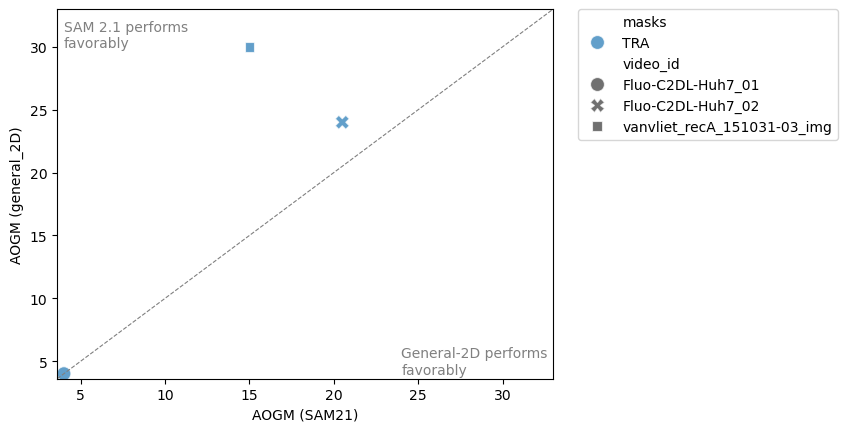

In [22]:
df_pivot = df.pivot_table(
    index=["video_id", "masks"], columns="model", values="AOGM"
).reset_index()

df_pivot = df_pivot.dropna(subset=["SAM21", "general_2D"])
df_pivot = df_pivot[df_pivot["masks"] == "TRA"]

sns.scatterplot(
    data=df_pivot,
    x="SAM21",
    y="general_2D",
    hue="masks",
    style="video_id",
    s=100,
    alpha=0.7,
)
plt.xlabel("AOGM (SAM21)")
plt.ylabel("AOGM (general_2D)")
plt.axline((0, 0), slope=1, color="gray", linestyle="--", linewidth=0.8)
plt.xlim(
    df_pivot[["SAM21", "general_2D"]].min().min() * 0.9,
    df_pivot[["SAM21", "general_2D"]].max().max() * 1.1,
)
plt.ylim(
    df_pivot[["SAM21", "general_2D"]].min().min() * 0.9,
    df_pivot[["SAM21", "general_2D"]].max().max() * 1.1,
)
plt.gca().set_aspect("auto")
plt.text(
    df_pivot[["SAM21", "general_2D"]].max().max() * 0.8,
    df_pivot[["SAM21", "general_2D"]].min().min(),
    "General-2D performs\nfavorably",
    color="gray",
    fontsize=10,
)
plt.text(
    df_pivot[["SAM21", "general_2D"]].min().min(),
    df_pivot[["SAM21", "general_2D"]].max().max() * 1,
    "SAM 2.1 performs\nfavorably",
    color="gray",
    fontsize=10,
)
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0.0)
plt.show()

In [23]:
gt_graph = ctc_matched.gt_graph
pred_graph = ctc_matched.pred_graph

v = napari.current_viewer()
if v is not None:
    v.close()
v = napari.Viewer()
for layer in v.layers:
    v.layers.remove(layer)
v.theme = "dark"

divis = Divisualisation(
    z_scale=1,
    time_scale=12,
    tracks_width=2,
)

v = divis.visualize_gt(
    v,
    x=img,
    # masks=pred.segmentation,
    masks=pred_sam21.segmentation,
    # networkx graph at traccuracy.TrackingGraph.graph
    graph=gt_graph.graph,
)

v = divis.visualize_edge_errors(
    viewer=v,
    gt_graph=gt_graph,
    pred_graph=pred_graph,
    # masks_original=gt.segmentation,
    # masks_tracked=pred.segmentation,
    masks_original=pred_sam21.segmentation,
    masks_tracked=pred_general_2d.segmentation,
)

100%|██████████| 183/183 [00:00<00:00, 180559.31it/s]
INFO:divisualisation.divisualisation:Adding gt tracks


INFO:OpenGL.acceleratesupport:No OpenGL_accelerate module loaded: No module named 'OpenGL_accelerate'
